In [1]:
import pandas as pd
import numpy as np
import pysubgroup as ps

In [6]:
num_heroes = 113
columns = ['win', 'clusterid', 'gamemode', 'gametype'] + [f'hero{i}' for i in range(1, num_heroes + 1)]

In [16]:
df = pd.read_csv('dota2Train.csv', header=None, names=columns)
print(df.head())

   win  clusterid  gamemode  gametype  hero1  hero2  hero3  hero4  hero5  \
0   -1        223         2         2      0      0      0      0      0   
1    1        152         2         2      0      0      0      1      0   
2    1        131         2         2      0      0      0      1      0   
3    1        154         2         2      0      0      0      0      0   
4   -1        171         2         3      0      0      0      0      0   

   hero6  ...  hero104  hero105  hero106  hero107  hero108  hero109  hero110  \
0      0  ...        0        0        0        0        0        0        0   
1     -1  ...        0        0        0        0        0        0        0   
2     -1  ...        0        0        0        0        0        0        0   
3      0  ...       -1        0        0        0        0        0        0   
4     -1  ...        0        0        0        0        0        0        0   

   hero111  hero112  hero113  
0        0        0        0  


In [3]:
hero_columns = df.columns[4:]
df[hero_columns] = df[hero_columns].astype('category')

In [4]:
target_variable = 'win'
target = ps.BinaryTarget(target_variable, 1)

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop('win', axis=1)
y = df['win']

selector = SelectKBest(f_classif, k=113)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features: ", selected_features)

Selected Features:  Index(['clusterid', 'gamemode', 'gametype', 'hero1', 'hero2', 'hero3', 'hero4',
       'hero5', 'hero6', 'hero7',
       ...
       'hero103', 'hero104', 'hero105', 'hero106', 'hero107', 'hero109',
       'hero110', 'hero111', 'hero112', 'hero113'],
      dtype='object', length=113)


c:\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 26 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


              precision    recall  f1-score   support

          -1       0.56      0.50      0.53      8773
           1       0.59      0.66      0.62      9757

    accuracy                           0.58     18530
   macro avg       0.58      0.58      0.58     18530
weighted avg       0.58      0.58      0.58     18530

Accuracy:  0.5803561791689152


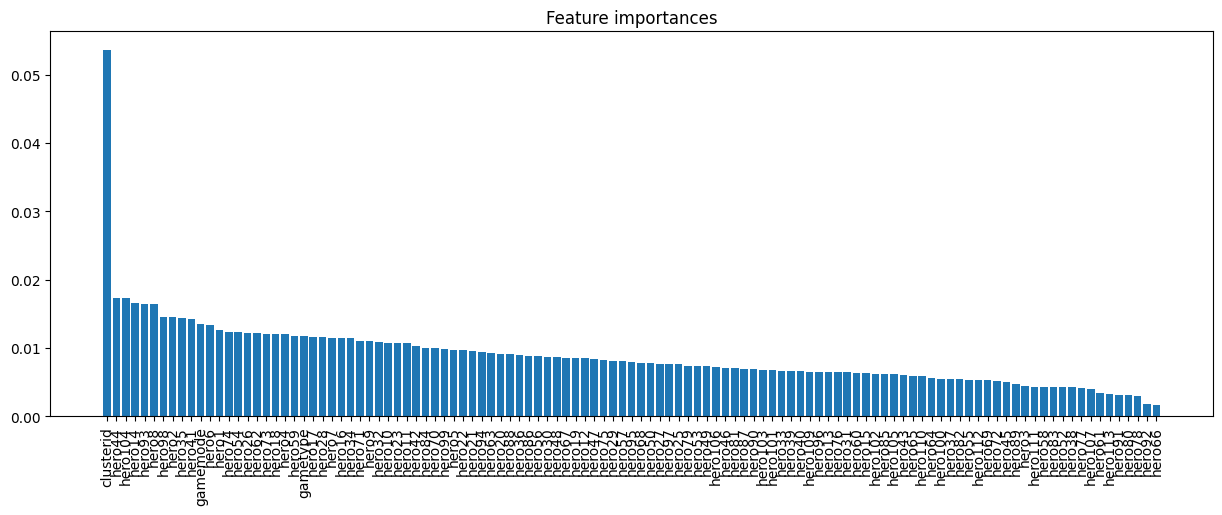

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 5))
plt.title("Feature importances")
plt.bar(range(X_new.shape[1]), importances[indices], align="center")
plt.xticks(range(X_new.shape[1]), selected_features[indices], rotation=90)
plt.show()